## YouTube Channel: www.youtube.com/@ItisSoftInfo

### SHAP analysis or SHAP values with all Plots in Python | Part 1: https://youtu.be/X6ehVmlV2Go
### SHAP analysis or SHAP values with all Plots in Python | Part 2: https://youtu.be/BTnl07_l2H4


Before starting SHAP Analysis you need to install the following:
1. Python
2. Anaconda Navigator.
3. Install required liberaries.

For installing liberaries:

Open "Anaconda Prompt" as Administrator and Run the following commands:

command 1: pip3 install xgboost

command 2: pip install shap

# Importing Relevant Libraries

In [3]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error

# For loading and previewing of data

1. We are reading data from a .csv file.
2. If you don't have a .csv file of data, first create one.
3. Place the .csv file in the folder where you created your Python file.
4. In our case it is "Downloads\Untitled Folder".
5. The "SHAP.csv" is the name of .csv file created in "Step 2".
6. The name of file and this should be same.

In [4]:
df = pd.read_csv("SHAP.csv")
df.head()

,A,B,C,D,E,F,G,H,Model Values
0,1.52,1.78,0.51,0.05,0.3,0.25,14.2,0.00,171.46
1,1.52,1.78,0.51,0.05,0.3,0.25,14.2,0.51,255.16
2,1.52,1.78,0.51,0.05,0.3,0.25,14.2,1.52,376.90
3,1.52,1.78,0.51,0.05,0.3,0.25,14.2,4.57,519.95
4,1.52,1.78,0.51,0.05,0.3,0.25,14.2,7.61,553.94


# Viewing summary of data

In [5]:
df = pd.read_csv("SHAP.csv")
df.head()

,A,B,C,D,E,F,G,H,Model Values
0,1.52,1.78,0.51,0.05,0.3,0.25,14.2,0.00,171.46
1,1.52,1.78,0.51,0.05,0.3,0.25,14.2,0.51,255.16
2,1.52,1.78,0.51,0.05,0.3,0.25,14.2,1.52,376.90
3,1.52,1.78,0.51,0.05,0.3,0.25,14.2,4.57,519.95
4,1.52,1.78,0.51,0.05,0.3,0.25,14.2,7.61,553.94


# Declaring "X" and "Y" values

Make sure the names of variables are same both in code and in .csv file

In [6]:
X = df[['A','B','C','D','E','F','G','H']]

y = df['Model Values']

# Splitting the data into train and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# Building the model with Random Forest Classifier

In [8]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

# Generating Predictions

In [9]:
y_pred = model.predict(X_test)

# Evaluating Performance

In [10]:
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

34.58809866590458

# Explaining the model's predictions using SHAP

In [11]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualizing the first prediction's explanation

This plot shows each feature contributing to push the model output from the base value (the average model output over the training dataset) 
to the model output.
Features pushing the prediction higher are shown in red and those pushing the prediction lower are in blue.

So, E, G, and H pushes the prediction higher and D, B, A, and F pushes the prediction lower.

The base value of the "Model Value" is 579.89

In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

# Visualizing the training set predictions

The following plot is interactive. Just scroll the mouse and see the different values.

In [13]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

# Standard way of plotting feature importance

To visualize the SHAP feature importance for a trained random forest model, the features are sorted in decreasing order of importance and plotted accordingly. The resulting plot displays the mean absolute Shapley values.

In the specific figure presented, the variable "H" is identified as the most important feature.

This code automatically saves the picture in parent folder with the defined name in code.

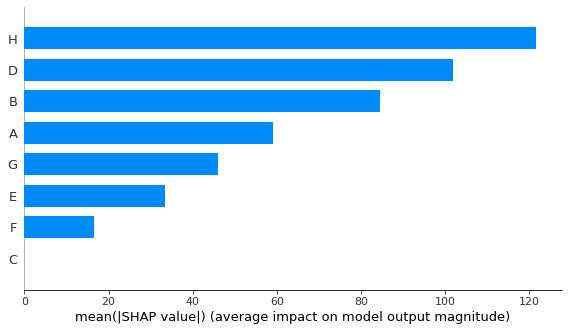

In [14]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, show=False, plot_type="bar")
plt.savefig('Parameter Importance.JPG', dpi=300, bbox_inches ='tight')

# Summary plot combining feature importance with feature effects

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.

The features are ordered according to their importance.

This code automatically saves the picture in parent folder with the defined name in code.

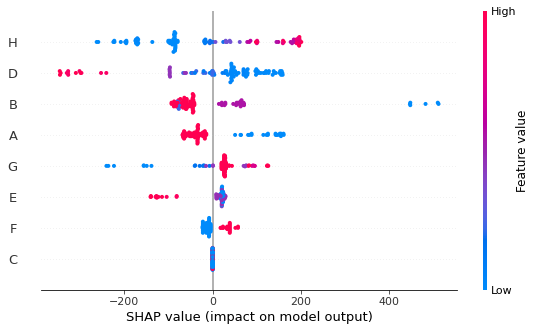

In [15]:
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig('Parameter Influence.JPG', dpi=300, bbox_inches ='tight')

# Dependence plots

A SHAP dependence plot visualizes the relationship between a feature and the model's predicted outcome. 

It helps identify linear or non-linear relationships and interactions with other features.

The automatically selects the variable that has the strongest interaction with the chosen variable, providing insight into how their combined effect affects the predicted outcome.

This code automatically saves the picture in parent folder with the defined name in code.

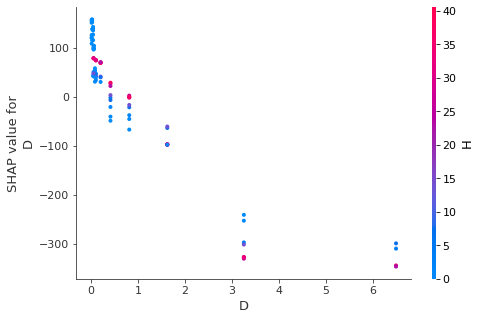

In [16]:
shap.dependence_plot('D', shap_values, X_train, show=False)
plt.savefig('D Dependence.JPG', dpi=300, bbox_inches ='tight')

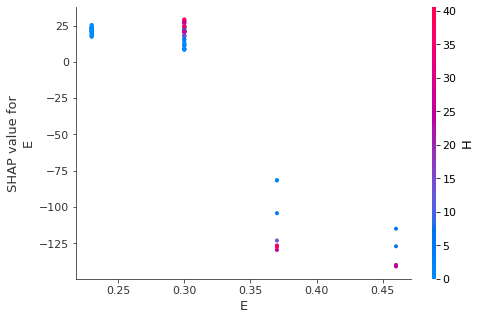

In [17]:
shap.dependence_plot('E', shap_values, X_train, show=False)
plt.savefig('E Dependence.JPG', dpi=300, bbox_inches ='tight')

# Waterfall Plot

A waterfall plot provides a detailed breakdown of how each feature contributes to the final prediction for a "specific instance". Each bar in the plot represents a feature, and the length of the bar represents the magnitude and direction of its contribution.

1. f(x) represents the model's predicted output or target value for the "specific observation" [0] being analyzed in the waterfall plot.

2.  E[f(x)] in the waterfall plot represents the average or expected prediction of the model, serving as the starting point for understanding the influence of individual features on the final prediction f(x)

3. The baseline value is represented by a vertical dashed line in the middle. Positive SHAP values, shown by bars to the right of the baseline, indicate features that have a positive effect on the prediction. Higher values of these features contribute to higher predictions, while lower values contribute to lower predictions. Conversely, negative SHAP values, shown by bars to the left of the baseline, indicate features that have a negative effect on the prediction. Higher values of these features contribute to lower predictions, while lower values contribute to higher predictions.

The waterfall plot can help you understand the importance and directionality of each feature's impact on the model's prediction, providing insights into how the model makes decisions for specific instances.

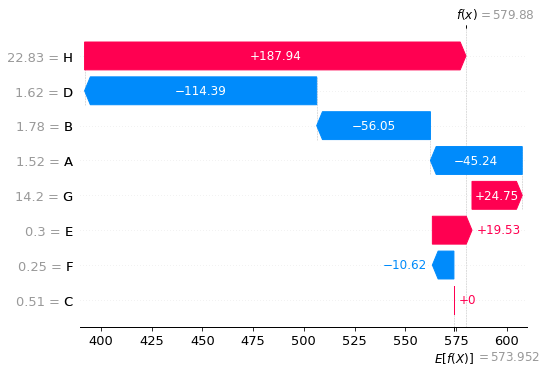

In [18]:
# Get SHAP values
explainer = shap.TreeExplainer(model, X_train)
# Choose one code from the following two lines to run.
shap_values = explainer(X_train)                            # Run this line of code
# shap_values = explainer(X_train, check_additivity=False)    # or Run this line of code

# waterfall plot for first observation
shap.plots.waterfall(shap_values[0], show=False)
plt.savefig('Waterfall Plot.JPG', dpi=300, bbox_inches ='tight')

# Absolute Mean SHAP Plot

1. The resulting plot will show a bar for each feature, indicating the average magnitude of its SHAP value across the dataset.

2. The plot provides an overview of the relative importance of each feature in influencing the model's predictions.

3. The length of the bars indicates the overall importance or impact of each feature on the model's predictions, regardless of whether the impact is positive or negative.

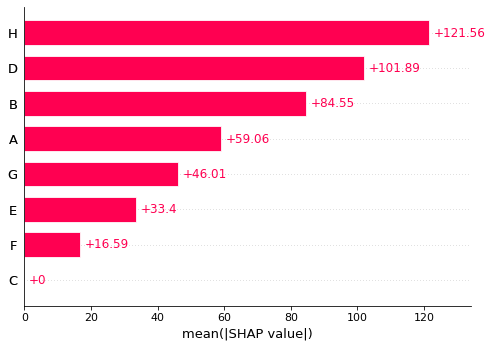

In [19]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute the SHAP values for your dataset
shap_values = explainer.shap_values(X_train)

# Create an Explanation object
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=X.columns)

# Generate the bar plot of SHAP values
shap.plots.bar(explanation, show=False)
plt.savefig('Absolute Mean SHAP Plot.JPG', dpi=300, bbox_inches ='tight')